In [1]:
#Data set exploration
import numpy as np
import pandas as pd

#Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from statsmodels.formula.api import ols

# Data for MMA survey

In [7]:
df = pd.read_excel('fs_amva.xlsx')
df

,AÑO_ENCU,Nlista,ZonaAMVA,Mu,Descripción CIIU,Grupo(Division),Macrogrupo,DescMG,NOMESTABLECIMIENTO,Horas Abierto,...,Tamaño estaBlecimiento,AreaT,Tiene Bodega,AreaBodega,Tiene Estacionamiento,TminutosParqueo,Viajes semanales,Kilogramos semanales,Tipo de producto,Vehiculo
0,2012,26,Medellin,10,472-Comercio al por menor de alimentos (vívere...,47,G,G-AL POR MAYOR Y MENOR; REPARE VEHÍCULOS AUTOS...,ALIMENTOS FRUVEX LTDA,9,...,Micro,250,1,2.0,1,23.333333,2.25,70.0000,NaN,NaN
1,2012,46,Medellin,10,241-Industrias básicas de hierro y de acero,24,C,C-INDUSTRIAS MANUFACTURERAS,LOTERO CARVAJAL FABIO DE JESUS,10,...,Micro,60,0,0.0,1,15.000000,8.00,1350.0000,NaN,NaN
2,2012,102,Medellin,10,241-Industrias básicas de hierro y de acero,24,C,C-INDUSTRIAS MANUFACTURERAS,CORREA BETANCUR RUBEN DARIO,10,...,Micro,10,0,0.0,1,5.000000,0.50,3.4375,NaN,NaN
3,2012,277,Medellin,10,464-Comercio al por mayor de artículos y enser...,46,G,G-AL POR MAYOR Y MENOR; REPARE VEHÍCULOS AUTOS...,RUIZ DIEGO FERNANDO,10,...,Micro,25,0,0.0,1,5.000000,3.75,0.1250,NaN,NaN
4,2012,294,Medellin,10,869-Otras actividades de atención relacionadas...,86,Q,Q-ACT. DE ATENCIÓN DE LA SALUD HUMANA Y DE ASI...,LOPEZ VELEZ MARIA MERCEDES,14,...,Micro,160,0,0.0,1,5.000000,0.25,7.5000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4356,2018,1001185,Medellin,10,475-Comercio al por menor de otros enseres dom...,47,G,G-AL POR MAYOR Y MENOR; REPARE VEHÍCULOS AUTOS...,FERRETERIA NATO,12,...,Mediana,28,1,0.0,1,60.000000,2.00,325.0000,NaN,NaN
4357,2018,1001186,Medellin,10,Comercio al por menor en puestos de venta móviles,47,G,G-AL POR MAYOR Y MENOR; REPARE VEHÍCULOS AUTOS...,OCHO OCHO LICORES,18,...,Micro,15,1,0.0,1,21.666667,3.00,53.3750,NaN,NaN
4358,2018,1001187,Medellin,10,475-Comercio al por menor de otros enseres dom...,47,G,G-AL POR MAYOR Y MENOR; REPARE VEHÍCULOS AUTOS...,DEPOSITO Y FERRETERIA,9,...,Mediana,40,1,0.0,1,31.666667,3.00,472.5000,NaN,NaN
4359,2018,1001188,Medellin,10,Comercio al por menor de otros enseres domésti...,47,G,G-AL POR MAYOR Y MENOR; REPARE VEHÍCULOS AUTOS...,DONDE RENE,14,...,Micro,15,1,0.0,1,12.500000,2.00,7.2500,NaN,NaN


In [10]:
print(df.columns)

Index(['AÑO_ENCU', 'Nlista', 'ZonaAMVA', 'Mu', 'Descripción CIIU ',
       'Grupo(Division)', 'Macrogrupo', 'DescMG', 'NOMESTABLECIMIENTO',
       'Horas Abierto', 'N Total empleaos', 'Tamaño estaBlecimiento', 'AreaT',
       'Tiene Bodega', 'AreaBodega', 'Tiene Estacionamiento',
       'TminutosParqueo', 'Viajes semanales', 'Kilogramos semanales',
       'Tipo de producto', 'Vehiculo'],
      dtype='object')


## Data for Food Service establishments

Categories of CIIU 561 and 563

In [15]:
# Fill NaN values in 'Descripción CIIU' column with an empty string
df['Descripción CIIU '] = df['Descripción CIIU '].fillna('')

# Create a boolean mask to filter rows
# Categories 561 and 563 corresponds to the FS
mask = df['Descripción CIIU '].str.contains(r'\b(?:561|563)-', regex=True)

# Use the mask to filter the DataFrame
fs_df = df[mask]

# Now, filtered_df contains rows where the 'Descripción CIIU' column contains 561 or 563 followed by a hyphen.
print(len(fs_df))

266


* Descriptive analysis

In [26]:
numeric_colums=['Horas Abierto', 'N Total empleaos', 'AreaT',
       'Tiene Bodega', 'AreaBodega', 'Tiene Estacionamiento',
       'TminutosParqueo', 'Viajes semanales', 'Kilogramos semanales']
numeric_fs_df=fs_df[numeric_colums]
numeric_fs_df.describe().round(2)

,Horas Abierto,N Total empleaos,AreaT,Tiene Bodega,AreaBodega,Tiene Estacionamiento,TminutosParqueo,Viajes semanales,Kilogramos semanales
count,266.00,266.00,266.00,266.00,266.00,266.00,266.00,266.00,266.00
mean,12.39,3.65,79.28,0.66,34.54,0.35,11.51,6.69,644.78
std,4.33,4.15,132.95,0.47,73.09,0.48,6.54,6.74,1640.97
min,4.00,1.00,4.00,0.00,0.00,0.00,1.00,0.25,1.10
25%,10.00,2.00,25.00,0.00,0.00,0.00,7.50,3.00,117.75
50%,12.00,3.00,45.00,1.00,16.00,0.00,10.00,5.00,255.90
75%,14.00,4.00,80.00,1.00,48.00,1.00,15.00,8.75,532.69
max,24.00,42.00,1450.00,1.00,1000.00,1.00,36.67,73.00,17610.00


In [27]:
numeric_fs_df

,Horas Abierto,N Total empleaos,AreaT,Tiene Bodega,AreaBodega,Tiene Estacionamiento,TminutosParqueo,Viajes semanales,Kilogramos semanales
25,10,4.0,120,1,10.0,1,15.000000,1.50,900.00
773,16,6.0,100,1,10.0,1,10.348837,11.00,300.00
809,10,1.0,60,1,15.0,1,6.833333,5.00,9.50
836,9,6.0,80,0,0.0,1,14.000000,0.75,47.50
873,10,1.0,4,0,0.0,1,13.333333,1.25,350.00
...,...,...,...,...,...,...,...,...,...
4236,11,4.0,130,1,130.0,0,15.000000,4.00,240.00
4237,10,4.0,80,1,80.0,0,2.000000,11.50,359.50
4243,4,3.0,25,1,25.0,0,15.000000,4.00,295.00
4354,13,4.0,70,1,0.0,1,27.500000,3.00,69.75


In [ ]:
# Check for negative values in each column
negative_values = numeric_fs_df.applymap(lambda x: x < 0)

# Print the results
print(negative_values)

* Box plots of the numeric columsn

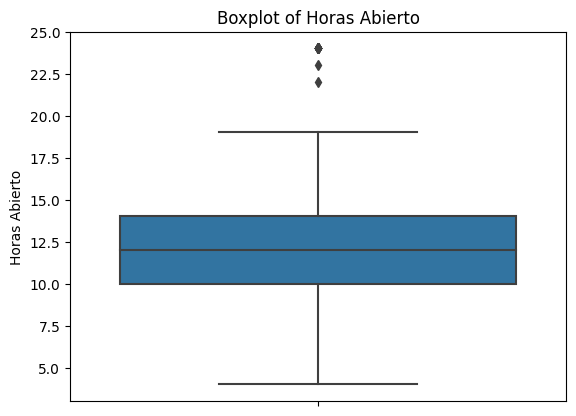

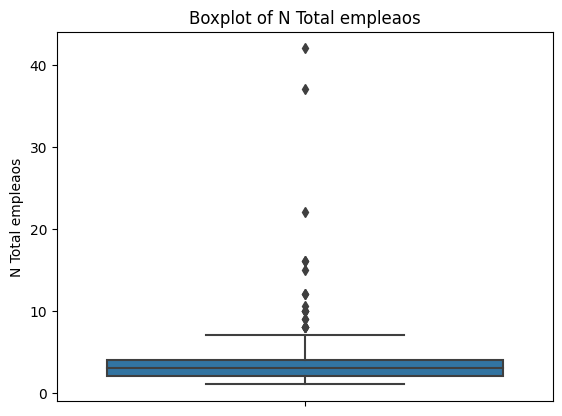

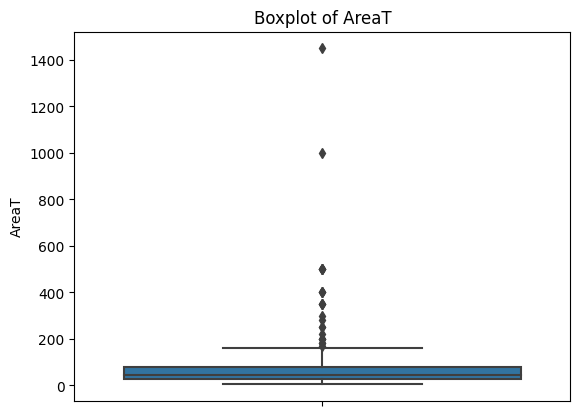

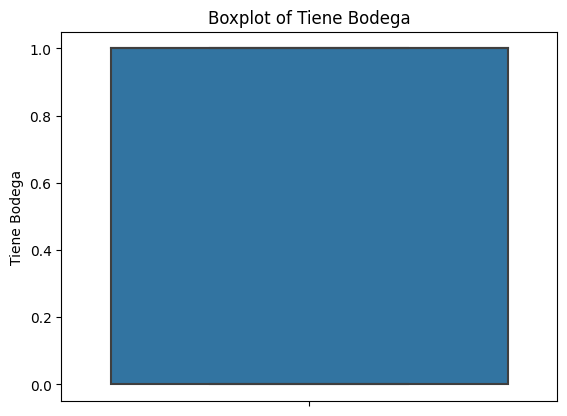

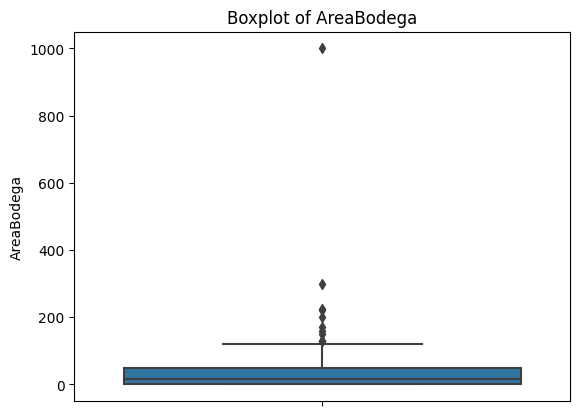

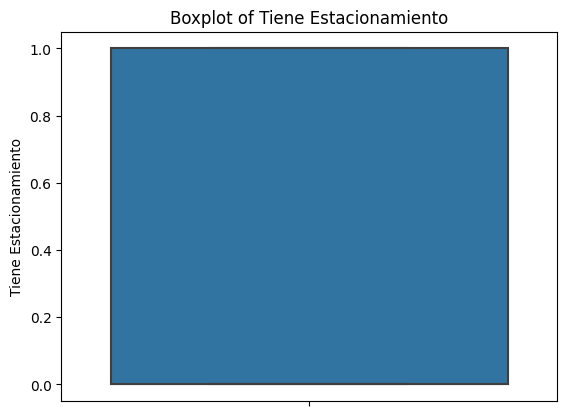

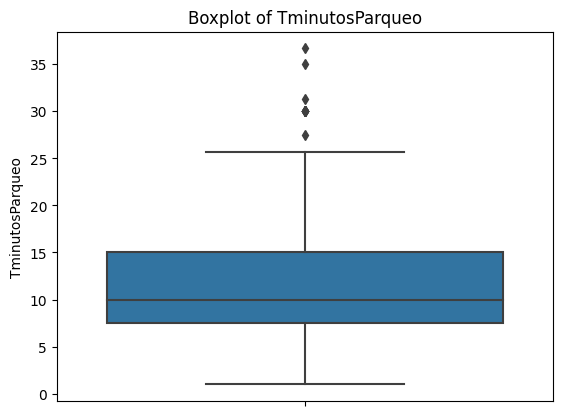

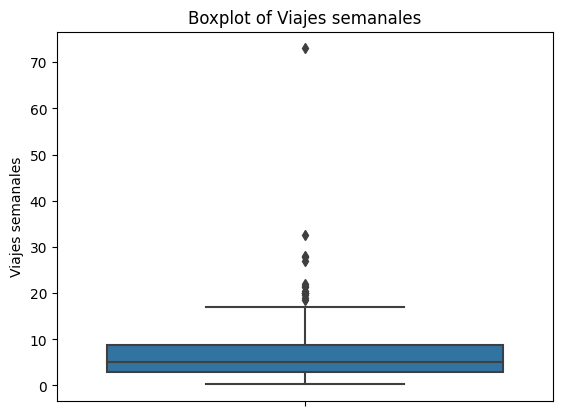

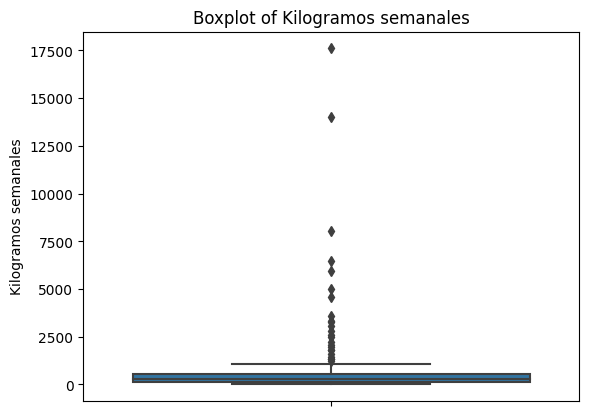

In [19]:
# Create a boxplot for each column
for column in numeric_fs_df.columns:
    sns.boxplot(y=numeric_fs_df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

* Histograms for each numeric data

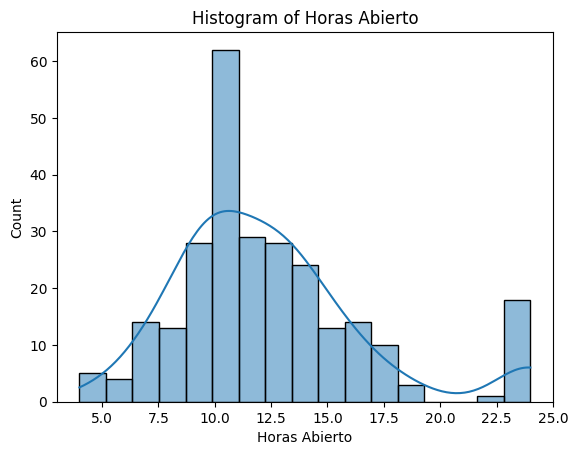

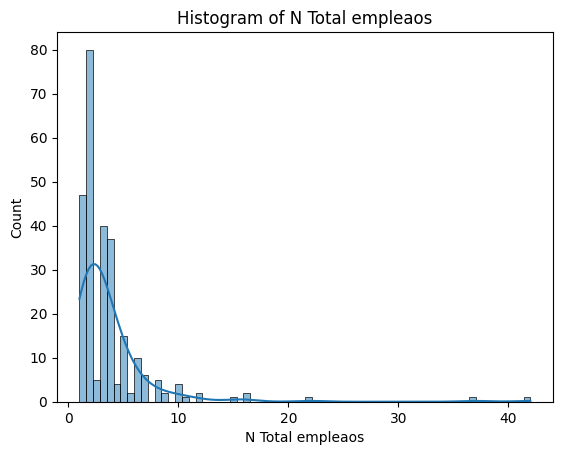

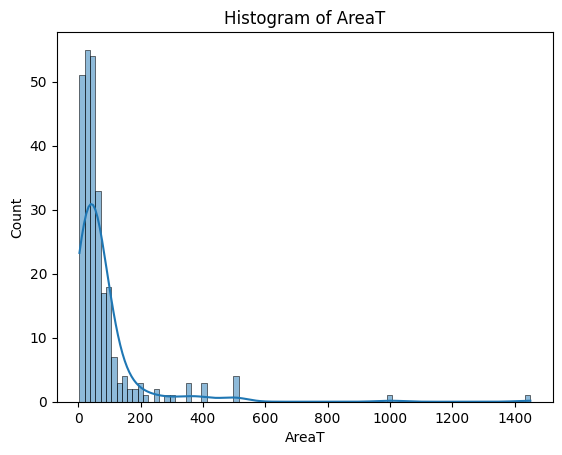

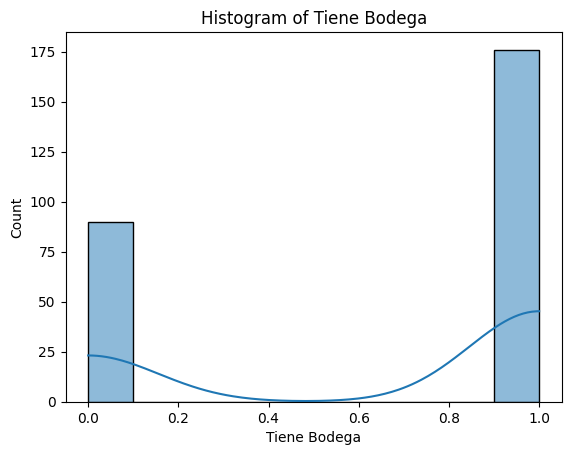

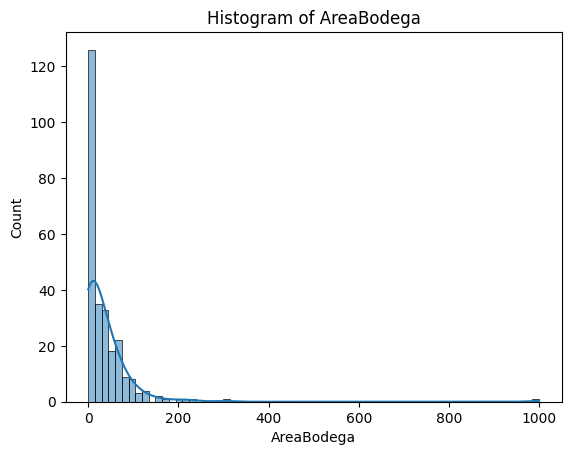

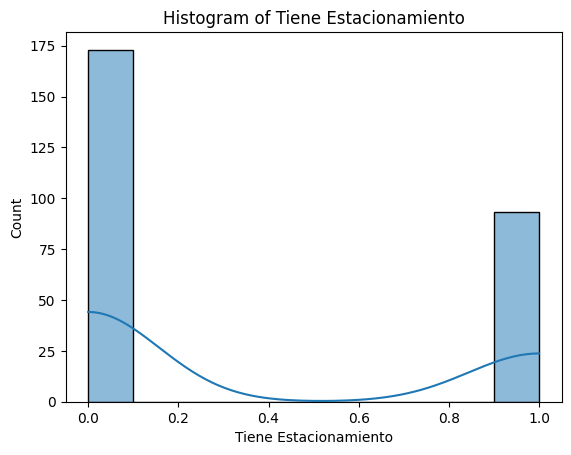

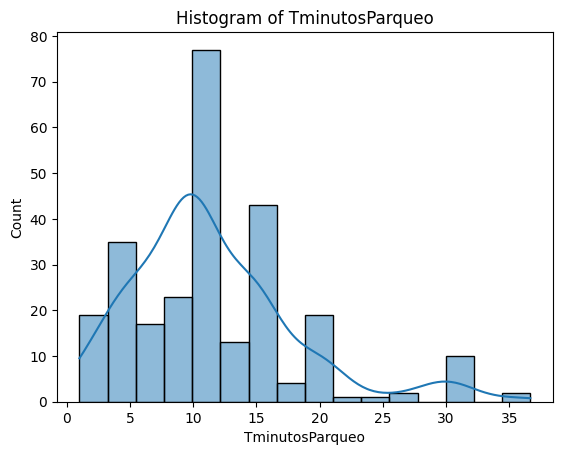

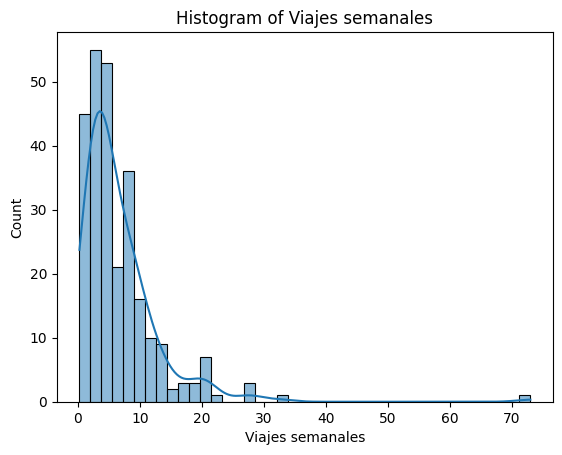

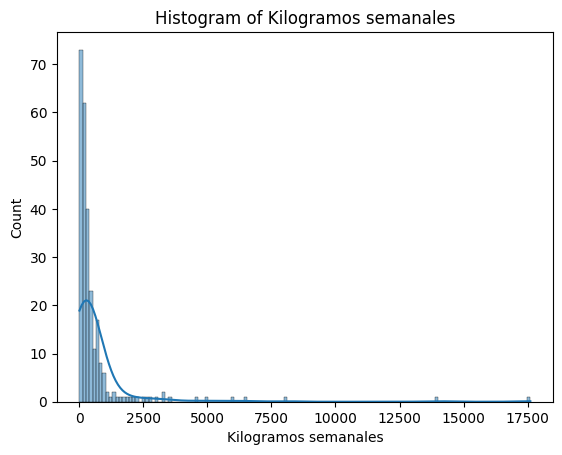

In [20]:
for column in numeric_fs_df.columns:
    sns.histplot(data=numeric_fs_df, x=column, kde=True)
    plt.title(f'Histogram of {column}')
    plt.show()

It corresponds a gamma distribution, so this analysis will be made like this

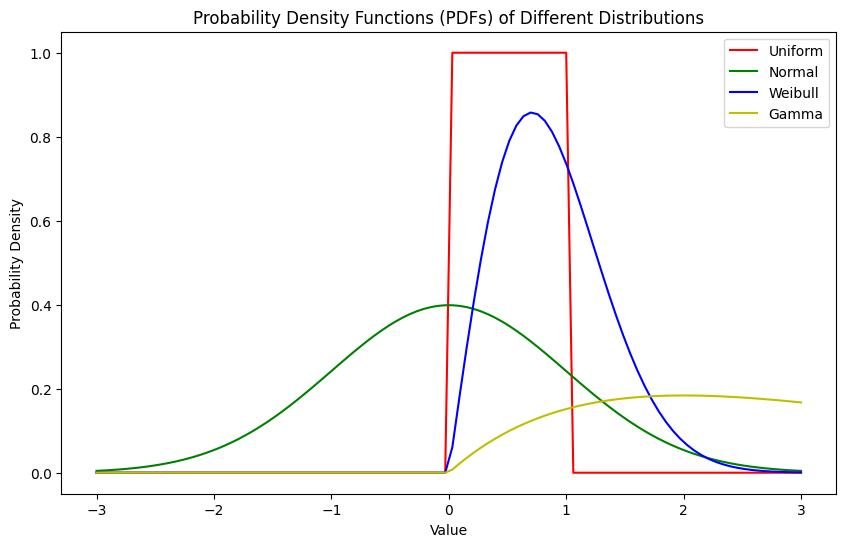

In [22]:
# Generate random data from different distributions
data_uniform = np.random.uniform(0, 1, 1000)
data_normal = np.random.normal(0, 1, 1000)
data_weibull = np.random.weibull(2, 1000)
data_gamma = np.random.gamma(2, 2, 1000)

# Define the range of x values for the plots
x = np.linspace(-3, 3, 100)

# Calculate the PDFs for each distribution
pdf_uniform = stats.uniform.pdf(x, loc=0, scale=1)
pdf_normal = stats.norm.pdf(x, loc=0, scale=1)
pdf_weibull = stats.weibull_min.pdf(x, c=2)
pdf_gamma = stats.gamma.pdf(x, a=2, scale=2)

# Create a single plot for all PDFs
plt.figure(figsize=(10, 6))

# Plot the PDFs of each distribution
plt.plot(x, pdf_uniform, 'r-', label='Uniform')
plt.plot(x, pdf_normal, 'g-', label='Normal')
plt.plot(x, pdf_weibull, 'b-', label='Weibull')
plt.plot(x, pdf_gamma, 'y-', label='Gamma')

# Set labels and title
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.title('Probability Density Functions (PDFs) of Different Distributions')

# Add a legend to identify each distribution
plt.legend()

# Show the plot
plt.show()

* Gamma distribution analysis

Mean for column 'Horas Abierto': 12.387218045112782
Median for column 'Horas Abierto': 12.0
Variance for column 'Horas Abierto': 18.635776471253322
Skewness for column 'Horas Abierto': 1.0998921542800069
Kurtosis for column 'Horas Abierto': 1.26149289937426


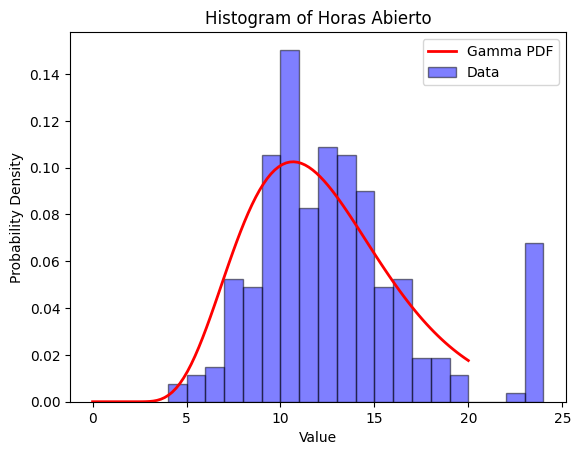

Mean for column 'N Total empleaos': 3.654135338345865
Median for column 'N Total empleaos': 3.0
Variance for column 'N Total empleaos': 17.192407711006833
Skewness for column 'N Total empleaos': 5.657709134990182
Kurtosis for column 'N Total empleaos': 42.79447450434157


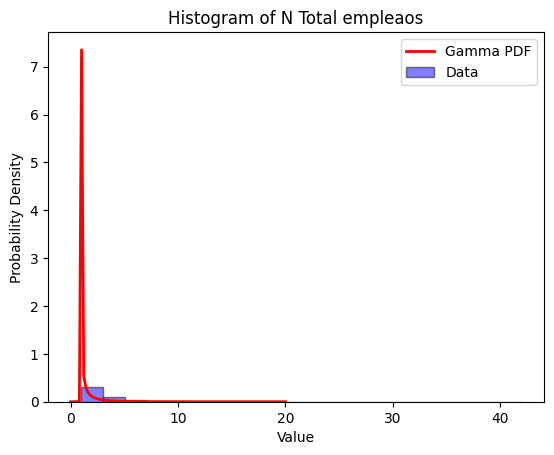

Mean for column 'AreaT': 79.28195488721805
Median for column 'AreaT': 45.0
Variance for column 'AreaT': 17608.67614053932
Skewness for column 'AreaT': 6.163685971663039
Kurtosis for column 'AreaT': 50.71806178462689


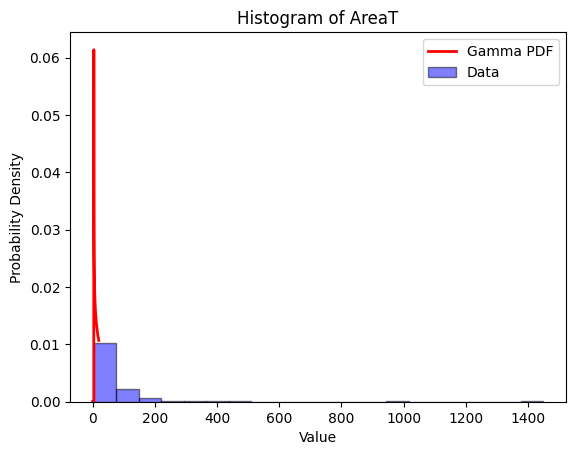

Mean for column 'Tiene Bodega': 0.6626541353383457
Median for column 'Tiene Bodega': 1.001
Variance for column 'Tiene Bodega': 0.22386794052801176
Skewness for column 'Tiene Bodega': -0.6833148556260074
Kurtosis for column 'Tiene Bodega': -1.5330808080808092


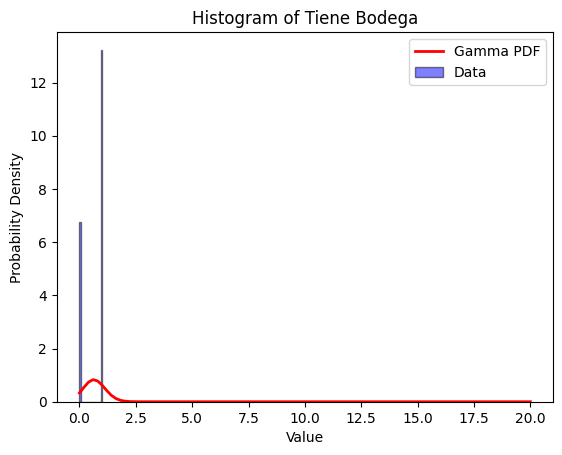

Mean for column 'AreaBodega': 34.53671428571428
Median for column 'AreaBodega': 16.001
Variance for column 'AreaBodega': 5322.777859828141
Skewness for column 'AreaBodega': 9.15595289110049
Kurtosis for column 'AreaBodega': 113.57834373793594


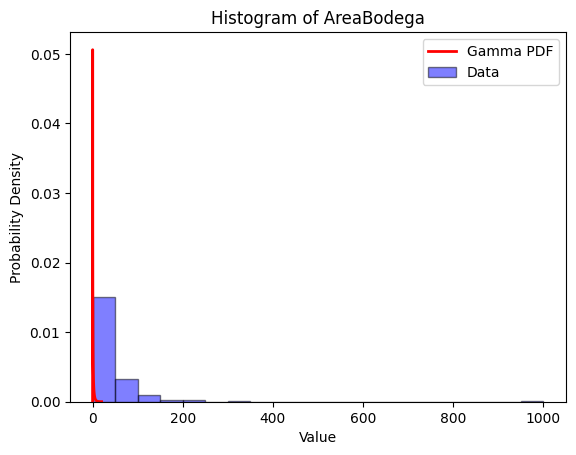

Mean for column 'Tiene Estacionamiento': 0.35062406015037584
Median for column 'Tiene Estacionamiento': 0.001
Variance for column 'Tiene Estacionamiento': 0.22738707671434216
Skewness for column 'Tiene Estacionamiento': 0.6307038196322438
Kurtosis for column 'Tiene Estacionamiento': -1.6022126919012987


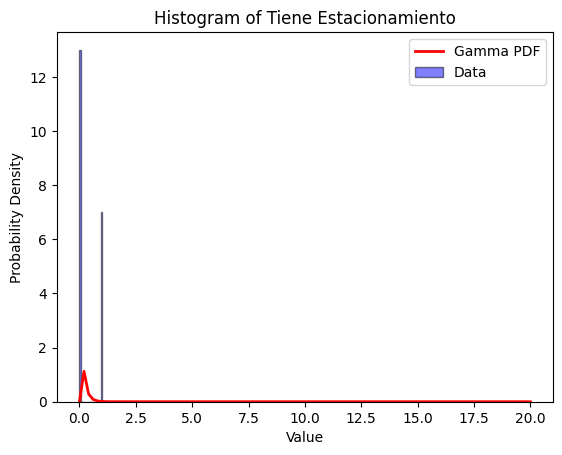

Mean for column 'TminutosParqueo': 11.506690111469679
Median for column 'TminutosParqueo': 10.0
Variance for column 'TminutosParqueo': 42.66409401791621
Skewness for column 'TminutosParqueo': 1.2214790800436948
Kurtosis for column 'TminutosParqueo': 1.9468969624040309


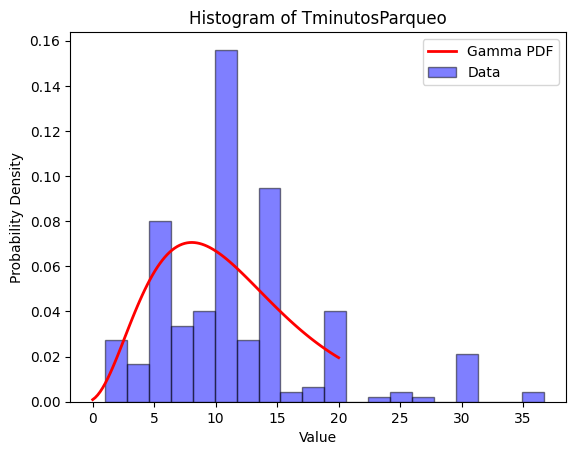

Mean for column 'Viajes semanales': 6.68796992481203
Median for column 'Viajes semanales': 5.0
Variance for column 'Viajes semanales': 45.322750014133085
Skewness for column 'Viajes semanales': 4.460255368432631
Kurtosis for column 'Viajes semanales': 35.154134567781846


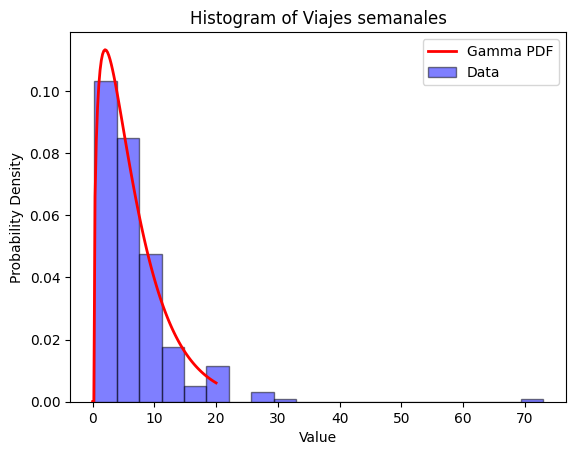

Mean for column 'Kilogramos semanales': 644.7763721804512
Median for column 'Kilogramos semanales': 255.89499999999998
Variance for column 'Kilogramos semanales': 2682646.642437873
Skewness for column 'Kilogramos semanales': 7.057632102145573
Kurtosis for column 'Kilogramos semanales': 59.916438579428956


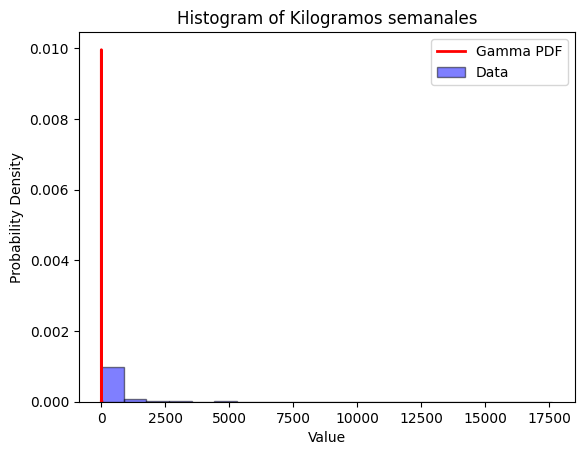

In [24]:
# Iterate through the columns
for column_name in numeric_fs_df.columns:
    # Extract the data from the column
    data = numeric_fs_df[column_name]

    # Check for and handle zero or negative values
    min_value = data.min()
    if min_value <= 0:
        data = data - min_value + 0.001  # Add a small constant to make data strictly positive


    # Step 1: Explore the data
    # Calculate summary statistics
    mean = np.mean(data)
    median = np.median(data)
    variance = np.var(data)
    skewness = stats.skew(data)
    kurtosis = stats.kurtosis(data)

    # Create a histogram
    plt.hist(data, bins=20, density=True, alpha=0.5, color='blue', edgecolor='black')
    plt.xlabel('Value')
    plt.ylabel('Probability Density')
    plt.title(f'Histogram of {column_name}')

    # Step 2: Hypothesis Testing
    # Perform goodness-of-fit test (Kolmogorov-Smirnov test)
    ks_statistic, ks_p_value = stats.kstest(data, 'gamma', args=(2, 0, 2))
    if ks_p_value > 0.05:
        print(f"H0 (gamma distribution) is not rejected for column '{column_name}' (p-value =", ks_p_value, ")")

    # Step 3: Parameter Estimation
    shape_estimate, loc_estimate, scale_estimate = stats.gamma.fit(data)

    # Step 4: Descriptive Statistics
    print(f"Mean for column '{column_name}':", mean)
    print(f"Median for column '{column_name}':", median)
    print(f"Variance for column '{column_name}':", variance)
    print(f"Skewness for column '{column_name}':", skewness)
    print(f"Kurtosis for column '{column_name}':", kurtosis)

    # Step 5: Confidence Intervals (Optional)
    # Calculate confidence intervals for parameter estimates
    ci_shape = stats.gamma.fit(data, floc=0)[0:2]
    ci_scale = stats.gamma.fit(data, f0=shape_estimate)[2:4]

    # Step 6: Visualization
    # Create a PDF plot of the gamma distribution overlaid with the histogram
    x = np.linspace(0, 20, 100)
    pdf_gamma = stats.gamma.pdf(x, shape_estimate, loc_estimate, scale_estimate)
    plt.plot(x, pdf_gamma, 'r-', lw=2)

    # Step 7: Inferential Statistics (e.g., calculate probabilities, percentiles)

    # Step 8: Model Assessment (visual comparison of PDF and histogram)

    # Step 9: Residual Analysis (Optional)

    # Step 10: Reporting (document findings)

    # Show the plot
    plt.legend(['Gamma PDF', 'Data'])
    plt.show()

* Graphs of distributions

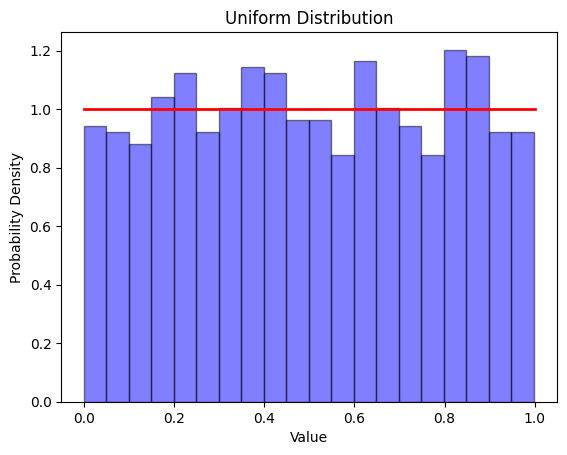

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Generate random data from a uniform distribution
data_uniform = np.random.uniform(0, 1, 1000)

# Create a histogram
plt.hist(data_uniform, bins=20, density=True, alpha=0.5, color='blue', edgecolor='black')

# Plot the PDF of the uniform distribution
x = np.linspace(0, 1, 100)
pdf_uniform = stats.uniform.pdf(x, loc=0, scale=1)
plt.plot(x, pdf_uniform, 'r-', lw=2)

plt.title('Uniform Distribution')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.show()


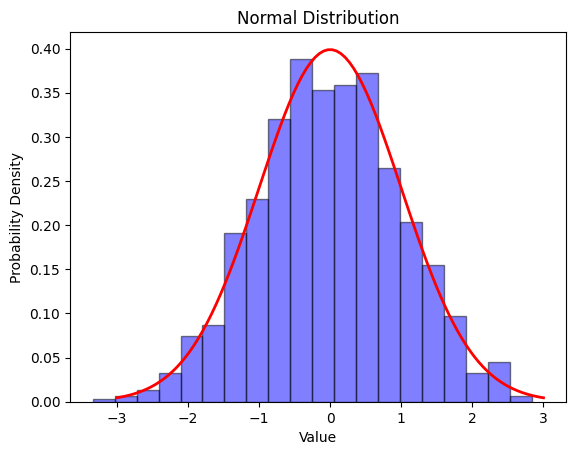

In [55]:
# Generate random data from a normal distribution
data_normal = np.random.normal(0, 1, 1000)

# Create a histogram
plt.hist(data_normal, bins=20, density=True, alpha=0.5, color='blue', edgecolor='black')

# Plot the PDF of the normal distribution
x = np.linspace(-3, 3, 100)
pdf_normal = stats.norm.pdf(x, loc=0, scale=1)
plt.plot(x, pdf_normal, 'r-', lw=2)

plt.title('Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.show()

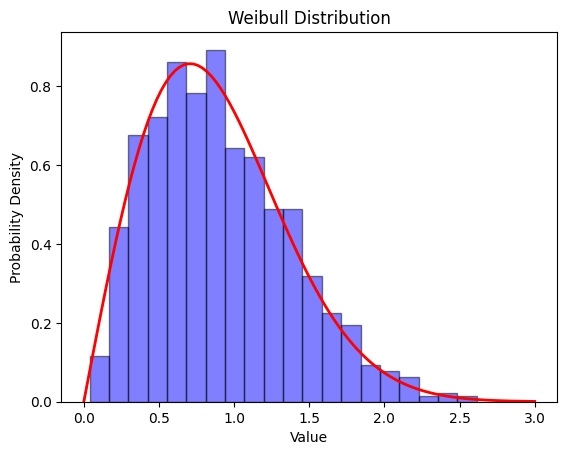

In [56]:
# Generate random data from a Weibull distribution
data_weibull = np.random.weibull(2, 1000)

# Create a histogram
plt.hist(data_weibull, bins=20, density=True, alpha=0.5, color='blue', edgecolor='black')

# Plot the PDF of the Weibull distribution
x = np.linspace(0, 3, 100)
pdf_weibull = stats.weibull_min.pdf(x, c=2)
plt.plot(x, pdf_weibull, 'r-', lw=2)

plt.title('Weibull Distribution')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.show()

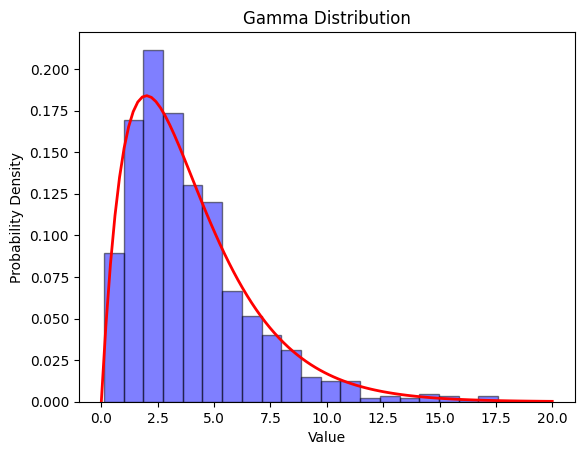

In [57]:
# Generate random data from a gamma distribution
data_gamma = np.random.gamma(2, 2, 1000)

# Create a histogram
plt.hist(data_gamma, bins=20, density=True, alpha=0.5, color='blue', edgecolor='black')

# Plot the PDF of the gamma distribution
x = np.linspace(0, 20, 100)
pdf_gamma = stats.gamma.pdf(x, a=2, scale=2)
plt.plot(x, pdf_gamma, 'r-', lw=2)

plt.title('Gamma Distribution')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.show()

## Modeling

In [28]:
import pandas as pd

# Function to check if a variable is continuous
def is_continuous(series):
    # Check if the data type is numeric (int or float)
    if pd.api.types.is_numeric_dtype(series):
        # Check if the number of unique values is large
        return len(series.unique()) > 10  # Adjust the threshold as needed
    return False

# Check if each column is continuous
for column_name in numeric_fs_df.columns:
    column = numeric_fs_df[column_name]
    if is_continuous(column):
        print(f"'{column_name}' is a continuous variable.")
    else:
        print(f"'{column_name}' is not a continuous variable.")


'Horas Abierto' is a continuous variable.
'N Total empleaos' is a continuous variable.
'AreaT' is a continuous variable.
'Tiene Bodega' is not a continuous variable.
'AreaBodega' is a continuous variable.
'Tiene Estacionamiento' is not a continuous variable.
'TminutosParqueo' is a continuous variable.
'Viajes semanales' is a continuous variable.
'Kilogramos semanales' is a continuous variable.


<Axes: xlabel='Count', ylabel='Viajes semanales'>

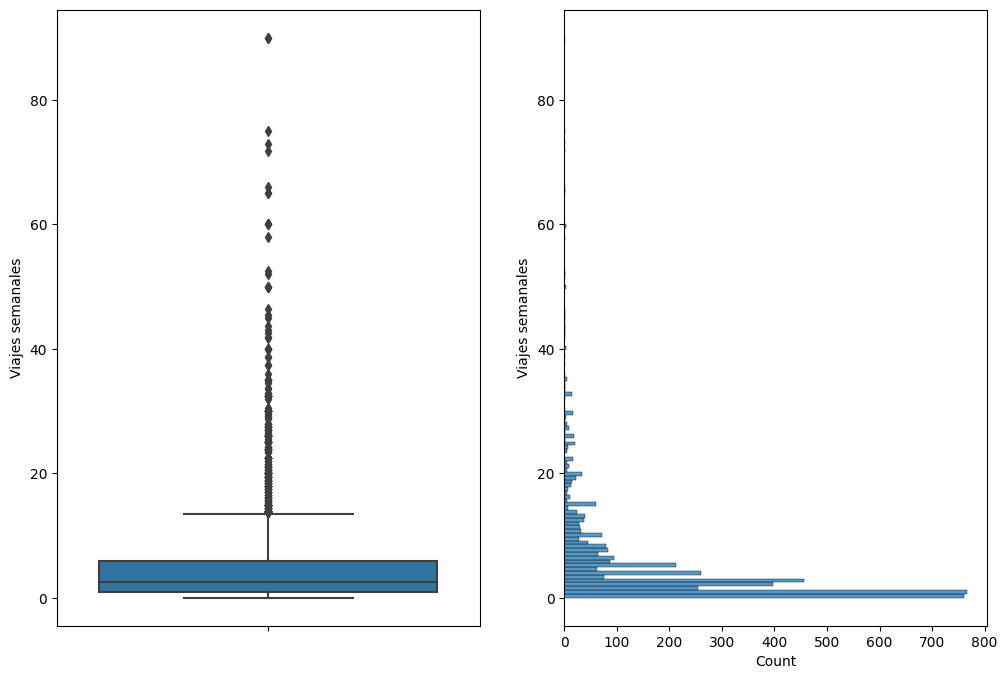

In [23]:
fig, ax =plt.subplots(1,2, figsize=(12,8))
sns.boxplot(y='Viajes semanales',data=df, ax=ax[0])
sns.histplot(y='Viajes semanales',data=df, ax=ax[1])